### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0
# Youtube: https://www.youtube.com/watch?v=H6du_pfuznE&t=357s

x

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('UNVR-long.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,7760.0,7760.0,7760.0,7760.0,6857.312500,0
1,2017-01-03,7800.0,7840.0,7760.0,7765.0,6861.731445,5014500
2,2017-01-04,7770.0,8070.0,7770.0,8040.0,7104.741699,10642000
3,2017-01-05,8100.0,8110.0,8005.0,8110.0,7166.599121,10493500
4,2017-01-06,8060.0,8190.0,7965.0,8120.0,7175.434570,5400500
...,...,...,...,...,...,...,...
1257,2021-12-24,4090.0,4210.0,4080.0,4200.0,4200.000000,11979500
1258,2021-12-27,4200.0,4230.0,4170.0,4210.0,4210.000000,7238100
1259,2021-12-28,4210.0,4230.0,4180.0,4180.0,4180.000000,7006900
1260,2021-12-29,4180.0,4190.0,4120.0,4120.0,4120.000000,9030700


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0       7760.0
1       7765.0
2       8040.0
3       8110.0
4       8120.0
         ...  
1257    4200.0
1258    4210.0
1259    4180.0
1260    4120.0
1261    4110.0
Name: Close, Length: 1262, dtype: float64

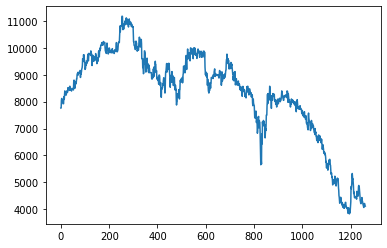

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [8]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.53532609]
 [0.53600543]
 [0.57336957]
 ...
 [0.04891304]
 [0.04076087]
 [0.03940217]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1009, 253)

In [14]:
train_data

array([[0.53532609],
       [0.53600543],
       [0.57336957],
       ...,
       [0.5       ],
       [0.48980978],
       [0.51358696]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(998, 10)
(998,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(242, 10)
(242,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(5,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(5,return_sequences=True))
model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 5)             140       
                                                                 
 lstm_1 (LSTM)               (None, 10, 5)             220       
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 586
Trainable params: 586
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
32/32 [==============================] - 8s 62ms/step - loss: 0.2583 - val_loss: 0.0116
Epoch 2/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0302 - val_loss: 0.0874
Epoch 3/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0079 - val_loss: 0.0613
Epoch 4/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0068 - val_loss: 0.0585
Epoch 5/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0062 - val_loss: 0.0509
Epoch 6/50
32/32 [==============================] - 1s 18ms/step - loss: 0.0056 - val_loss: 0.0456
Epoch 7/50
32/32 [==============================] - 1s 18ms/step - loss: 0.0049 - val_loss: 0.0376
Epoch 8/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0041 - val_loss: 0.0318
Epoch 9/50
32/32 [==============================] - 1s 16ms/step - loss: 0.0034 - val_loss: 0.0246
Epoch 10/50
32/32 [==============================] - 1s 16ms/step - loss: 0.0027 - val_loss: 0.0188
Epoch 11/

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.8.0'

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## RMSE Train

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

8985.727433911476

## RMSE Test

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5979.1530927643835

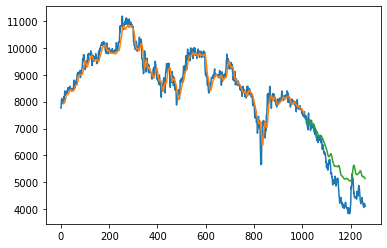

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

253

In [32]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 0)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[]

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3
i=0
while(i<30):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: ignored

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

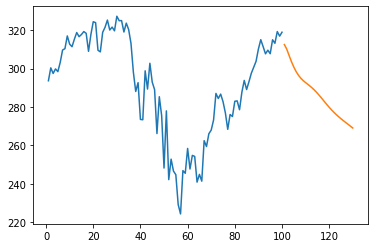

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

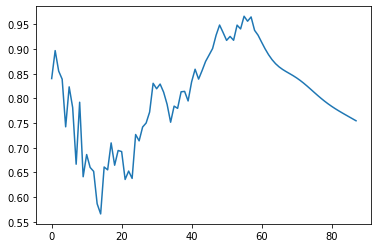

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

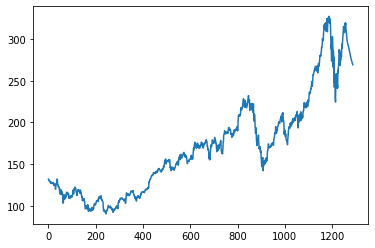

In [ ]:
plt.plot(df3)